In [5]:
pip install plotly

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [7]:
dataset=pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
dataset.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,5168,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


In [9]:
dataset.drop(["Time from Start to Finish (seconds)"],axis=1,inplace=True)
dataset.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."


In [10]:
question=pd.DataFrame(dataset.loc[:0])
question.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."


In [11]:
dataset=dataset.iloc[1:]
dataset.head(1)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Age distribution(Q1)</h1>
<h3>References</h3>
<a href="https://plotly.com/python/bar-charts/">https://plotly.com/python/bar-charts/<br>
<a href="https://plotly.com/python/legend/">https://plotly.com/python/legend/

In [12]:
fig1 = px.bar(dataset["Q1"].value_counts().sort_index(),title="Age Distribution",labels={"index":"Age","value":"Distribution"})
fig1.update_layout(showlegend=False)
fig1.show()

The above visualization shows that most of the users falls under 25-29 Age Category

<h1>Gender Distribution(Q2)</h1>
<h3>References</h3>
<a href="https://plotly.com/python/horizontal-bar-charts/">https://plotly.com/python/horizontal-bar-charts/

In [13]:
fig2 = px.bar(dataset["Q2"].value_counts(),title="Gender Distribution",labels={"index":"Gender","value":"Distribution"}, orientation='h',)
fig2.update_layout(showlegend=False)
fig2.show()

The above visualization shows that most of Kaggle users are Men

<h1>Age and Gender Distribution(Q1 & Q2)</h1>
<h3>Reference</h3>
<a href="https://seaborn.pydata.org/generated/seaborn.countplot.html">Count plot

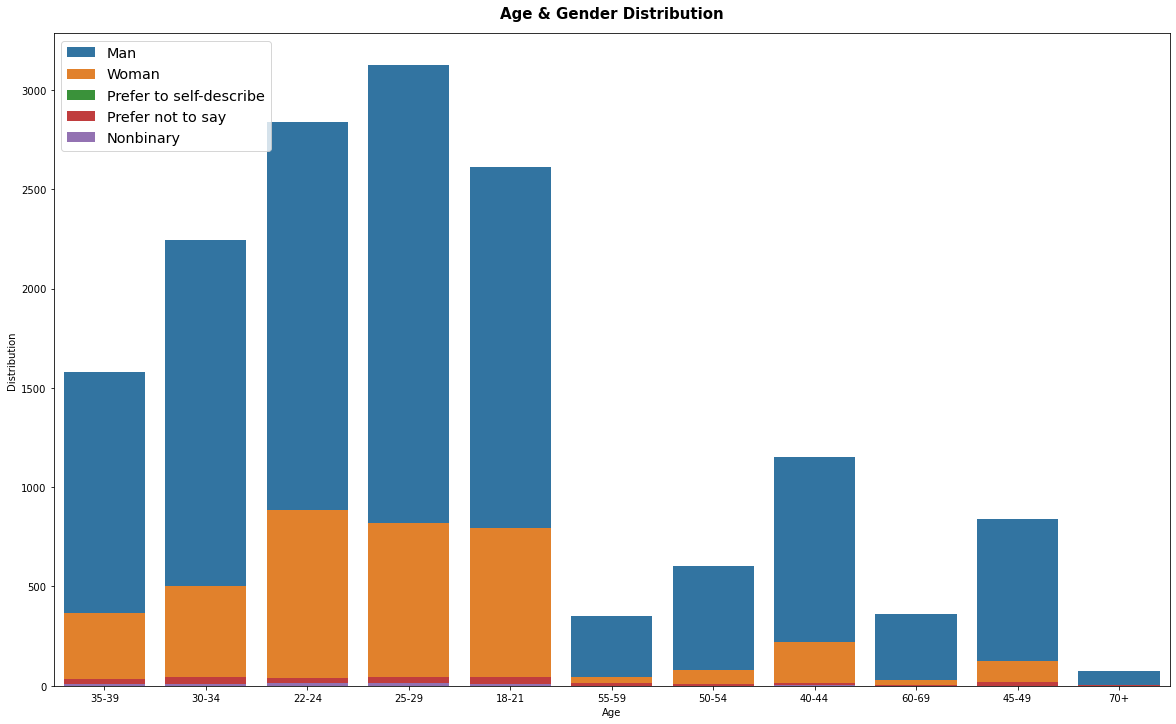

In [14]:
plt.figure(figsize=(20,12))
sns.countplot(data=dataset,x="Q1",hue="Q2",dodge=False),
plt.xlabel("Age")
plt.ylabel("Distribution")
plt.title("Age & Gender Distribution",fontweight="bold",fontsize=15,pad=15)
plt.legend(fontsize='x-large', title_fontsize='40')

<h1>Country Distribution(Q3)</h1>

In [15]:
fig4 = px.bar(dataset["Q3"].value_counts(),title="Country Distribution",labels={"index":"Country","value":"Distribution"},width=1000,height=800)
fig4.update_layout(showlegend=False)
fig4.show()

Most of Kaggle Users are from <b>India</b>

<h1>Education & Experience Distribution(Q4 & Q6)</h1>
<a href="https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis">Pivot table & Heat Map

In [16]:
fig5 = px.bar(dataset["Q4"].value_counts(),title="Education Distribution",labels={"index":"Education","value":"Distribution"},height=600)
fig5.update_layout(showlegend=False)
fig5.show()

Kaggle users with Master's Degree is more than Kaggle users with Bachelor's Degree

In [17]:
fig6 = px.bar(dataset["Q6"].value_counts().sort_index(),title="Experience Distribution",labels={"index":"Experience","value":"Distribution"},
category_orders={"index": ["< 1 years", "1-2 years", "3-5 years", "5-10 years","10-20 years","20+ years","I have never written code"],})
fig6.update_layout(showlegend=False)
fig6.show()

Most of Kaggle users have expereince of 3-5 years

In [18]:
dataset["count"]=1

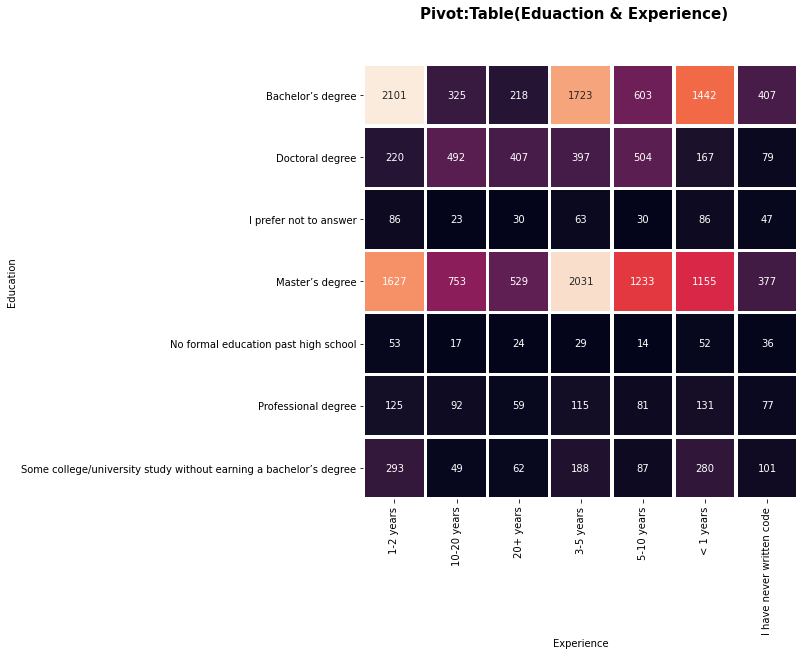

In [19]:
plt.figure(figsize=(8,8))
plt.suptitle("Pivot:Table(Eduaction & Experience)",fontweight="bold",fontsize=15)
sns.heatmap(pd.pivot_table(dataset,values="count",index="Q4",columns="Q6",aggfunc=np.sum),annot=True,square=True, linewidth=2.5, fmt="d",cbar=False)
plt.xlabel("Experience")
plt.ylabel("Education")
plt.show()

<h1>Job Distribution(Q5)</h1>

In [20]:
fig7=px.bar(dataset["Q5"].value_counts(),labels={"index":"Job","value":"Distribution"},title="Job Distribution")
fig7.update_layout(showlegend=False)
fig7.show()

The above graph shows that <b>most of the kaggle users are Students</b>

<h1>Recommended Programming Languages for Beginners(Q8)</h1>

In [21]:
fig8=px.bar(dataset["Q8"].value_counts(),labels={"index":"Programming Language","value":"Distribution"},title="Recommended Programming Language")
fig8.update_layout(showlegend=False)
fig8.show()

Python is suggested by most Kaggle users for beginners

<h1>Computing Platform Used(Q11)</h1>

In [22]:
fig9=px.bar(dataset["Q11"].value_counts(),labels={"index":"Computing Platform","value":"Distribution"},title="Computing platform used",height=600)
fig9.update_layout(showlegend=False)
fig9.show()

More than 50% users use their own PC/Laptop

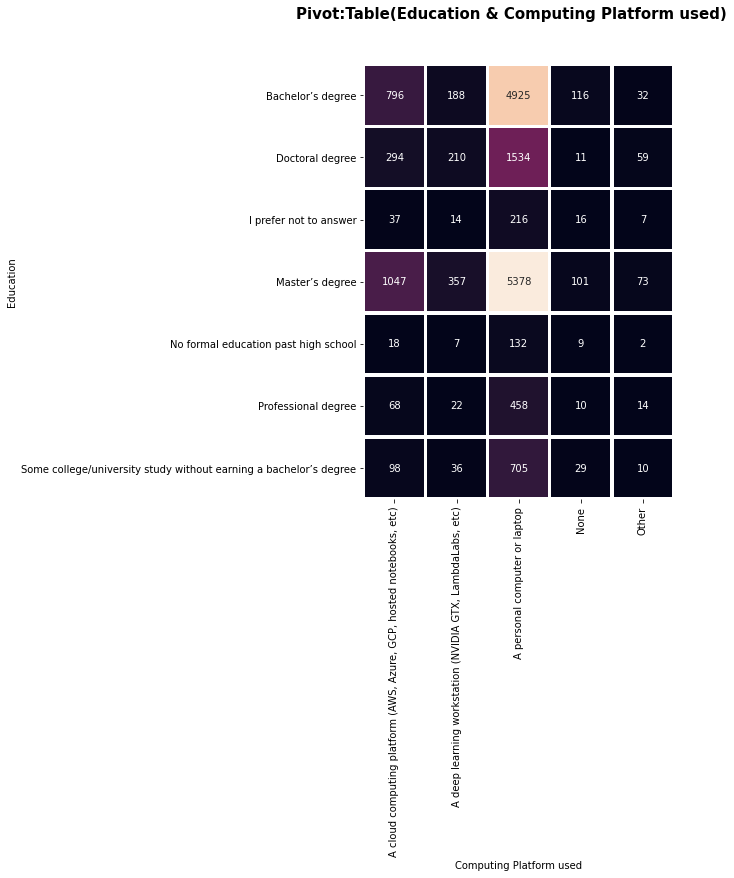

In [23]:
plt.figure(figsize=(8,8))
plt.suptitle("Pivot:Table(Education & Computing Platform used)",fontweight="bold",fontsize=15)
sns.heatmap(pd.pivot_table(dataset,values="count",index="Q4",columns="Q11",aggfunc=np.sum),annot=True,square=True, linewidth=2.5, fmt="d",cbar=False)
plt.xlabel("Computing Platform used")
plt.ylabel("Education")
plt.margins(x=10,y=10)
plt.show()

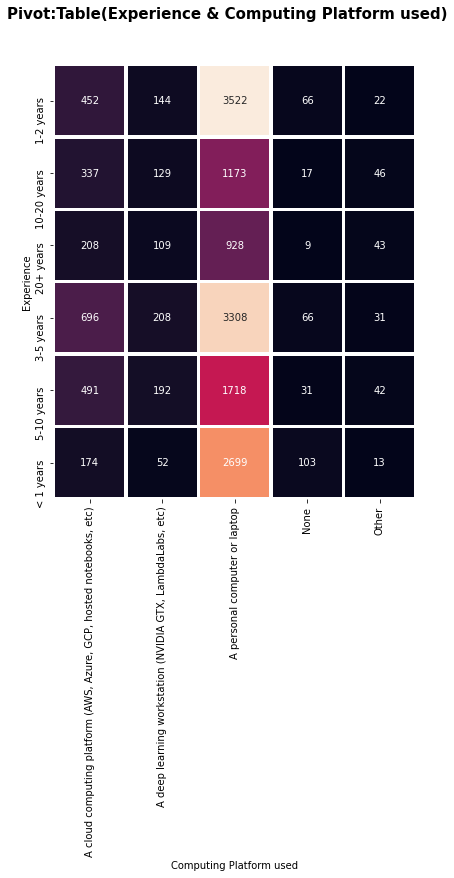

In [24]:
plt.figure(figsize=(8,8))
plt.suptitle("Pivot:Table(Experience & Computing Platform used)",fontweight="bold",fontsize=15)
sns.heatmap(pd.pivot_table(dataset,values="count",index="Q6",columns="Q11",aggfunc=np.sum),annot=True,square=True, linewidth=2.5, fmt="d",cbar=False)
plt.xlabel("Computing Platform used")
plt.ylabel("Experience")
plt.show()

<h1>ML Experience(Q15)</h1>

In [25]:
fig10=px.bar(dataset["Q15"].value_counts(),labels={"index":"ML Experience","value":"Distribution"},title="ML Experience",height=600)
fig10.update_layout(showlegend=False)
fig10.show()

Most of the Kaggle users only have less than 1 year experience

<h1>Education & Job Role Comparison</h1>
<h3>Reference</h3>
<a href="https://plotly.com/python/histograms/">Plotly histograms<br>
<a href="https://plotly.com/python/dropdowns/">Plotly Dropdowns<br>
<a href="https://www.kaggle.com/kenjee/kaggle-project-from-scratch">Ken Jee's kernel<br>
<a href="https://plotly.com/python/figure-labels/">Plotly graph objects title

In [26]:
roles=dataset["Q5"].unique()

cmp1 = go.Figure()

cmp1_trace1=go.Bar(x=dataset["Q4"].unique(), y=dataset[dataset["Q5"]=="Student"]["Q4"].value_counts(),name="Student")
cmp1.add_trace(cmp1_trace1)

buttons1=[]
for i in range(len(roles)-1):
    button=dict(
        label=roles[i],
        args=[{'y':[dataset[dataset["Q5"]==roles[i]]["Q4"].value_counts()],'name':roles[i]},[0]],
        method="restyle"
    )
    buttons1.append(button)



cmp1_trace2=go.Bar(x=dataset["Q4"].unique(), y=dataset[dataset["Q5"]=="Data Engineer"]["Q4"].value_counts(),name="Data Engineer")
cmp1.add_trace(cmp1_trace2)

buttons2=[]
for i in range(len(roles)-1):
    button=dict(
        label=roles[i],
        args=[{'y':[dataset[dataset["Q5"]==roles[i]]["Q4"].value_counts()],'name':roles[i]},[1]],
        method="restyle"
    )
    buttons2.append(button)

cmp1.update_layout(
    title="Comparison of Education for different Job Title",
    height=800,
    width=1000,
    updatemenus=[
        dict(
            buttons=buttons1,
            direction="down",
            active=0,
            showactive=True,
            x=0.22,
            xanchor="left",
            y=1.09,
            yanchor="top"
        ),
        dict(
            buttons=buttons2,
            direction="down",
            active=1,
            showactive=True,
            x=0.52,
            xanchor="left",
            y=1.09,
            yanchor="top"
        ),
    ],

)

cmp1.show()

<h1>Job Title & Experience Pivot Table(Q5 & Q15)</h1>

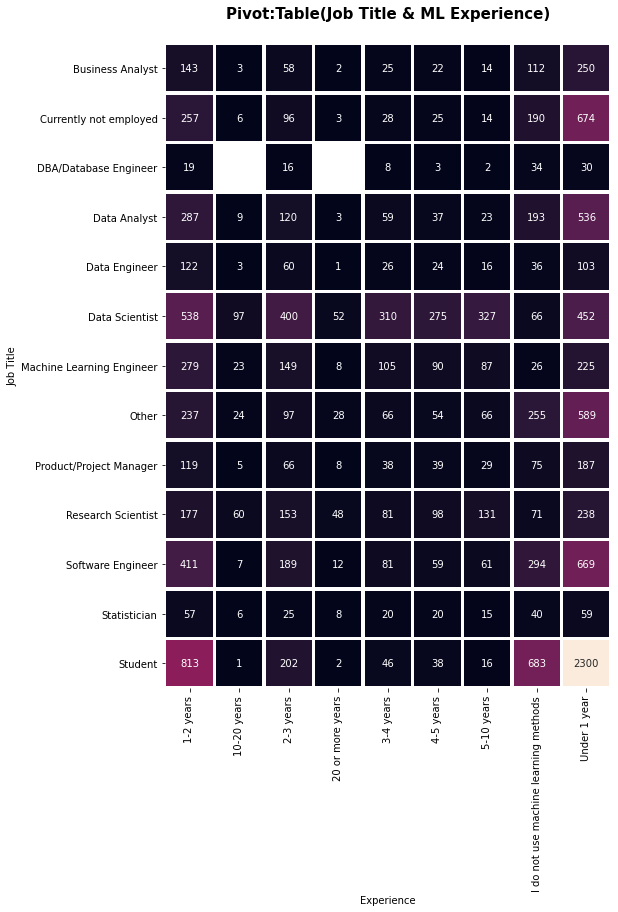

In [27]:
plt.figure(figsize=(8,15))
plt.title("Pivot:Table(Job Title & ML Experience)",fontweight="bold",fontsize=15,pad=25)
sns.heatmap(pd.pivot_table(dataset,values="count",index="Q5",columns="Q15",aggfunc=np.sum),annot=True,square=True, linewidth=2.5,fmt='.0f',cbar=False)
plt.xlabel("Experience")
plt.ylabel("Job Title")
plt.show()

<h1>Programming Languages Used(Q7)</h1>

In [28]:
Q7=dataset[dataset.columns[6:19]]
Q7.head()

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
fig11=px.histogram(x=["Python","R","SQL","C","C++","Java","JavaScript","Julia","Swift","Bash","MatLab","None","Other"],y=Q7.count(),title="Programming Language Used")
fig11.update_layout(
    xaxis_title="Programming Languages",
    yaxis_title="Users"
)
fig11.show()

Python due to its simplicity, is the most used language among Kaggle users

In [30]:
prog_combo=dataset[dataset.columns[6:19]].apply(lambda x:','.join(x.dropna()),axis=1)
combo1=px.bar(prog_combo.value_counts(),width=5000,height=800,title="Programming Language Combo used")
combo1.update_layout(
    xaxis_title="Programming Language Combo",
    yaxis_title="Users"
)
combo1.show()

Most of the users prefer python alone

<h1>Integrated Development Environment(IDE) Used(Q9)</h1>

In [31]:
Q9=dataset[dataset.columns[20:32]]
Q9.head()

,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER
1,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
fig12=px.histogram(x=["Jupyter (JupyterLab, Jupyter Notebooks, etc)","RStudio","Visual Studio","VS Code","PyCharm","Spyder","Notepad++","Sublime Text","Vim, Emacs or similar","MATLAB","None","Other"],y=Q9.count(),title="IDE Used",height=600)
fig12.update_layout(
    xaxis_title="IDE",
    yaxis_title="Users"
)
fig12.show()

Jupyter Notebook is the most preferred IDE

<h1>Specialized Hardware used(Q12)</h1>

In [33]:
Q12=dataset[dataset.columns[47:51]]
Q12.head()

,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER
1,GPUs,NaN,NaN,NaN
2,GPUs,NaN,NaN,NaN
3,NaN,NaN,None,NaN
4,NaN,NaN,None,NaN
5,NaN,NaN,NaN,NaN


In [34]:
fig13=px.histogram(x=["GPUs","TPUs","None","Other"],y=Q12.count(),title="Specialized Hardware Used")
fig13.update_layout(
    xaxis_title="Hardware",
    yaxis_title="Users"
)
fig13.update_traces(
    hovertemplate=None
)
fig13.show()

<h1>Usage of TPUs</h1>

In [35]:
fig14=px.bar(dataset["Q13"].value_counts(),title="TPU Usage")
fig14.update_layout(
    xaxis_title="Usage",
    yaxis_title="Users"
)
fig14.show()

Most of the Kaggle users have never used TPU

<h1>Platforms Used by Users to study Data Science(Q37)</h1>
<h3>References</h3>
<a href="https://community.plotly.com/t/plotly-express-histogram-any-way-to-sort-bar-by-value/23905/7">Sorting Values of Plotly histogram<br>
<a href="https://plotly.com/python/hover-text-and-formatting/">Formatting Hover Template

In [36]:
Q37=dataset[dataset.columns[230:242]]
Q37.head()

,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER
1,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN
2,Coursera,NaN,NaN,DataCamp,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN
3,Coursera,edX,NaN,NaN,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN
4,Coursera,NaN,NaN,DataCamp,NaN,NaN,NaN,LinkedIn Learning,NaN,University Courses (resulting in a university ...,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
fig15=px.histogram(x=["Coursera","edX","Kaggle Learn Courses","DataCamp","Fast.ai","Udacity","Udemy","LinkedIn Learning","Cloud-certification programs (direct from AWS, Azure, GCP, or similar)","University Courses (resulting in a university degree)","None","Other"],y=Q37.count(),height=1000,title="Online Platforms used to learn Data Science").update_xaxes(categoryorder="total descending")
fig15.update_layout(
    xaxis_title="Platforms",
    yaxis_title="Users"
)
fig15.update_traces(hovertemplate=None)
fig15.show()

Coursera is the most preferred online learning platform for Data Science

<h1>Preferred Online media sources for Data Science Topic(Q39)</h1>

In [38]:
Q39=dataset[dataset.columns[243:255]]
Q39.head()

,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
1,NaN,NaN,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
2,Twitter (data science influencers),NaN,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
3,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
fig16=px.histogram(x=["Twitter","Email newsletter","Reddit","Kaggle","Course forums","YouTube","Podcasts","Blogs","Journal Publications","Slack Communities","None","Other"],y=Q39.count(),title="Media sources to read Data Science Topics").update_xaxes(categoryorder="total descending")
fig16.update_layout(
    xaxis_title="Media Sources",
    yaxis_title="Users"
)
fig16.update_traces(hovertemplate=None)
fig16.show()

<h1>Approximate Money spend for ML and other Cloud Computing services</h1>

In [40]:
fig18=px.bar(dataset["Q25"].value_counts(),title="Approximate Money spend for ML and other Cloud Computing services")
fig18.update_layout(
    showlegend=False,
    xaxis_title="Money Spend",
    yaxis_title="Distribution"
)
fig18.update_traces(
    hovertemplate=None
)
fig18.show()

<h1>Job Roles vs Programming language used</h1>
<h3>Reference</h3>
<a href="https://plotly.com/python/subplots/">Plotly Subplots

In [46]:
jobroles=dataset["Q5"].dropna().unique()

In [48]:
jobroles.shape

(13,)

In [79]:
row,column=1,1
fig = make_subplots(rows=7, cols=2,subplot_titles=jobroles)
for i in jobroles:
    fig.add_trace(go.Bar(x=["Python","R","SQL","C","C++","Java","JavaScript","Julia","Swift","Bash","MatLab","None","Other"],y=dataset[dataset["Q5"]==i].iloc[:,6:19].count(),name=i),col=column,row=row)
    column=(column%2)+1
    if column==1:
        row=row+1
fig.update_layout(height=1500, width=1200,
                  title_text="Job Roles vs Programming language used")
fig.show()